In [63]:
import GPy

In [64]:
%matplotlib inline
from matplotlib import pyplot as plt

In [65]:
import numpy as np

In [66]:
def forrester(X):
    y = np.multiply(np.power(6*X-2,2), np.sin(2*(6*X-2)))
    return y

In [67]:
n_true = 50
X = np.linspace(0, 1, n_true)
y = forrester(X)

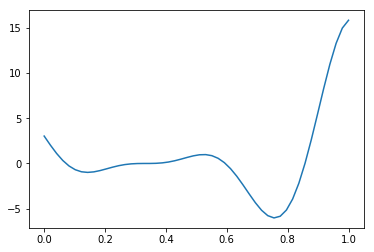

In [68]:
plt.plot(X,y)

In [138]:
n_train = 10
#X_train = np.linspace(0, 1, n_train)
X_train = np.array([0, 0.18, 0.25, 0.28, 0.5, 0.95, 1])
y_train = forrester(X_train) #+ np.random.normal(0, 0.05, size=X_train.size)

In [139]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [140]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [141]:
print(X_train.shape)
print(y_train.shape)

(7, 1)
(7, 1)


In [180]:
k = GPy.kern.RBF(1,variance=np.exp(0), lengthscale=1) 
m = GPy.models.GPRegression(X_train,y_train,k,noise_var=np.exp(-4))
m.optimize(max_iters = 1000)

GP_regression.,value,constraints,priors
rbf.variance,67.88031485196433,+ve,
rbf.lengthscale,0.1708155307861704,+ve,
Gaussian_noise.variance,1.7227494416075584e-06,+ve,


 /Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


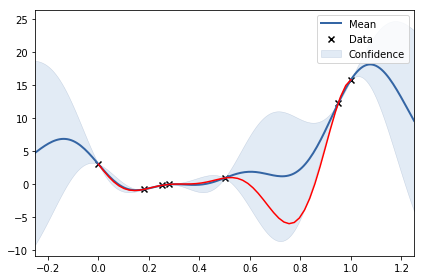

In [181]:
display(m)
fig = m.plot()
plt.plot(X, y,'r')